# EXAMEN
**Étudiants :**
>Paul BLIGNY
>Nathan PIVON

In [1]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

ECHANTILLON = 10000

terrain = np.load("terrain.npy")
terrain_width = terrain.shape[1]
terrain_height = terrain.shape[0]


# classe Robot et fonctions associées
class Robot:
    def __init__(self):
        self.x = random.uniform(0, 1200)
        self.y = random.uniform(0, 600)
        self.teta = random.uniform(0, 2 * math.pi)
        self.noise_angle = 0.2
        self.noise_move = 1.1
        self.noise_distance = 1.1

    def set_pos(self, x, y, teta):
        self.x = x
        self.y = y
        self.teta = teta

    def move(self, distance, angle):
        noise_distance = np.random.normal(0, self.noise_move)  # Bruit sur la distance parcourue
        noise_angle = np.random.normal(0, self.noise_angle)  # Bruit sur l'angle de déplacement
        
        # Calcul de l'angle réel après ajout du bruit
        real_teta = self.teta + angle + noise_angle

        # Calcul des déplacements en x et y après ajout du bruit
        dx = (distance + noise_distance) * np.cos(real_teta)
        dy = (distance + noise_distance) * np.sin(real_teta)

        # Mise à jour de la position du robot
        self.x += dx
        self.y += dy
        
        # Gestion des bords de la carte (modulo) pour que le robot reste à l'intérieur de la zone définie
        self.x = self.x % 1200
        self.y = self.y % 600

        # Mise à jour de l'angle avec bruit
        self.teta = (self.teta + angle + noise_angle) % (2 * np.pi)

    def calcul_distance(self, terrain):

        distances = []
        angles = [0, math.pi / 4, math.pi / 2, 3 * math.pi / 4, 
                math.pi, 5 * math.pi / 4, 3 * math.pi / 2, 7 * math.pi / 4]  # 8 directions
        for angle in angles:
            dist = 0
            x, y = self.x, self.y
            while True:
                x += math.cos(self.teta + angle)
                y += math.sin(self.teta + angle)
                dist += 1
                # Vérifie si on est sorti du terrain ou si le pixel est noir (mur)
                if x < 0 or x >= terrain.shape[1] or y < 0 or y >= terrain.shape[0]:
                    break
                if terrain[int(y), int(x)] == 0:
                    break
            distances.append(dist)
        return distances

Génération et affichage du robot

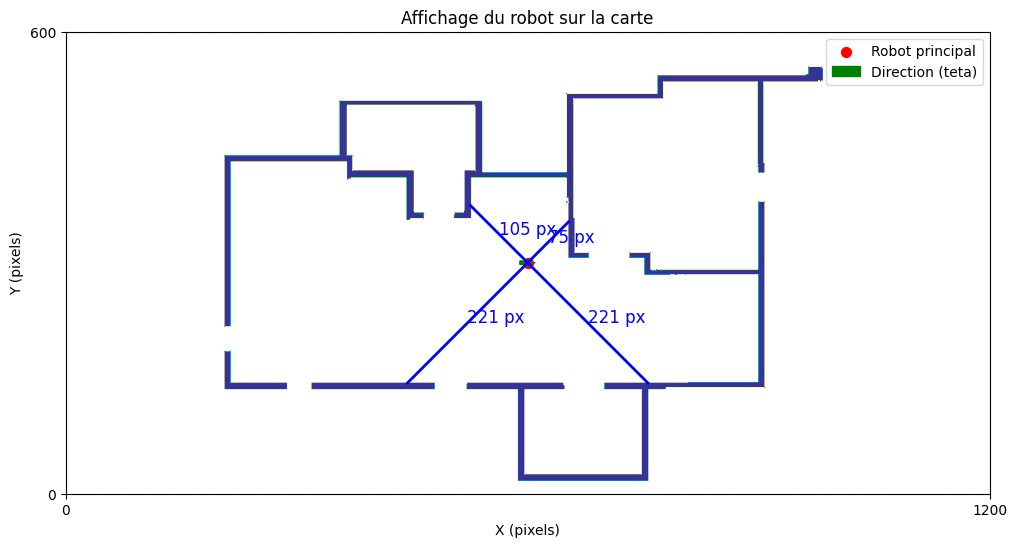

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Initialisation du robot
robot = Robot()
robot.set_pos(600, 300, math.pi * 0)
terrain = np.load("terrain.npy")
terrain_width = terrain.shape[1]
terrain_height = terrain.shape[0]

# Fonction pour tracer une diagonale et calculer la distance
def tracer_diagonale(robot, angle, terrain):
    x, y = robot.x, robot.y
    dx = math.cos(angle)
    dy = math.sin(angle)
    distance = 0
    
    while 0 <= int(x) < terrain_width and 0 <= int(y) < terrain_height:
        if terrain[int(y), int(x)] == 0:
            break
        x += dx
        y += dy
        distance += 1
    
    return x, y, distance

plt.figure(figsize=(12, 6))

# Affichage du terrain
plt.imshow(terrain, extent=(0, terrain_width, 0, terrain_height), origin='lower', cmap='terrain')

# affichage
plt.scatter(robot.x, robot.y, color="red", s=50, label="Robot principal")

dx = 10 * math.cos(robot.teta)
dy = 10 * math.sin(robot.teta)
plt.arrow(
    robot.x, robot.y, dx, dy,
    color="green", head_width=5, head_length=20, length_includes_head=True,
    label="Direction (teta)"
)

# diagonales
angles = [math.pi / 4, 3 * math.pi / 4, 5 * math.pi / 4, 7 * math.pi / 4]
for angle in angles:
    x_end, y_end, distance = tracer_diagonale(robot, angle, terrain)
    plt.plot([robot.x, x_end], [robot.y, y_end], color='blue', lw=2)
    plt.text((robot.x + x_end) / 2, (robot.y + y_end) / 2, f"{int(distance)} px", color='blue', fontsize=12)

# affichage
plt.title("Affichage du robot sur la carte")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(range(0, terrain_width + 1, 1200))
plt.yticks(range(0, terrain_height + 1, 600))
plt.xlabel("X (pixels)")
plt.ylabel("Y (pixels)")
plt.xlim(0, terrain_width)
plt.ylim(0, terrain_height)
plt.show()

Génération et affichage des particules

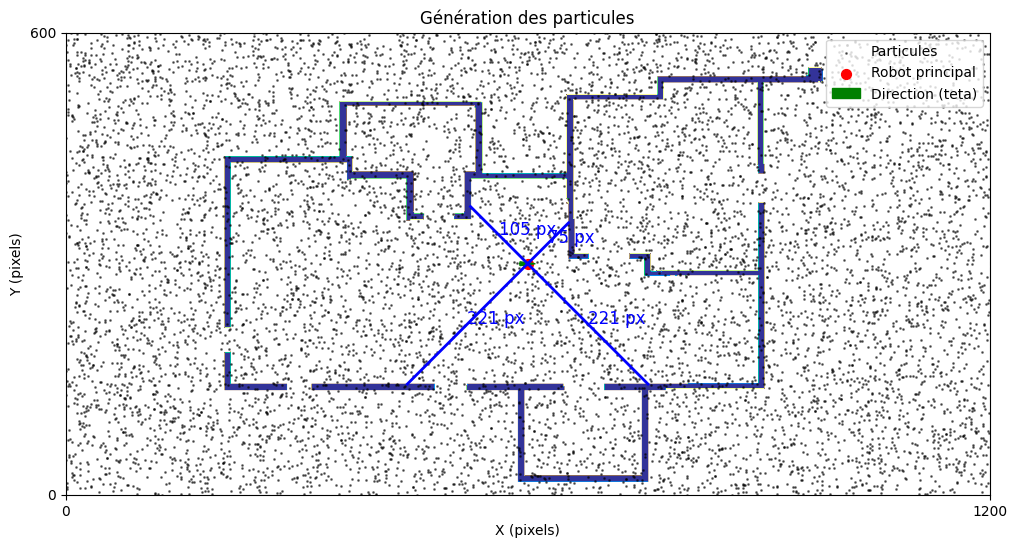

In [3]:
# création des particules
particules = [Robot() for _ in range(ECHANTILLON)]
for particule in particules:
    particule.set_pos(
        np.random.uniform(0, terrain_width),
        np.random.uniform(0, terrain_height),
        np.random.uniform(0, 2 * math.pi)
    )

plt.figure(figsize=(12, 6))
plt.imshow(terrain, extent=(0, terrain_width, 0, terrain_height), origin='lower', cmap='terrain')

# Affichage des particules
x_coords = [p.x for p in particules]
y_coords = [p.y for p in particules]
plt.scatter(x_coords, y_coords, color="black", s=1, alpha=0.5, label="Particules")

# Affichage ddu robot
plt.scatter(robot.x, robot.y, color="red", s=50, label="Robot principal")

# Affichage de la direction du robot
dx = 10 * math.cos(robot.teta)
dy = 10 * math.sin(robot.teta)
plt.arrow(
    robot.x, robot.y, dx, dy,
    color="green", head_width=5, head_length=20, length_includes_head=True,
    label="Direction (teta)"
)

# diagonales
angles = [math.pi / 4, 3 * math.pi / 4, 5 * math.pi / 4, 7 * math.pi / 4]
for angle in angles:
    x_end, y_end, distance = tracer_diagonale(robot, angle, terrain)
    plt.plot([robot.x, x_end], [robot.y, y_end], color='blue', lw=2)
    plt.text((robot.x + x_end) / 2, (robot.y + y_end) / 2, f"{int(distance)} px", color='blue', fontsize=12)

# affichage
plt.title("Génération des particules")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(range(0, terrain_width + 1, 1200))
plt.yticks(range(0, terrain_height + 1, 600))
plt.xlabel("X (pixels)")
plt.ylabel("Y (pixels)")
plt.xlim(0, terrain_width)
plt.ylim(0, terrain_height)
plt.show()

Mesure et sélection des particules

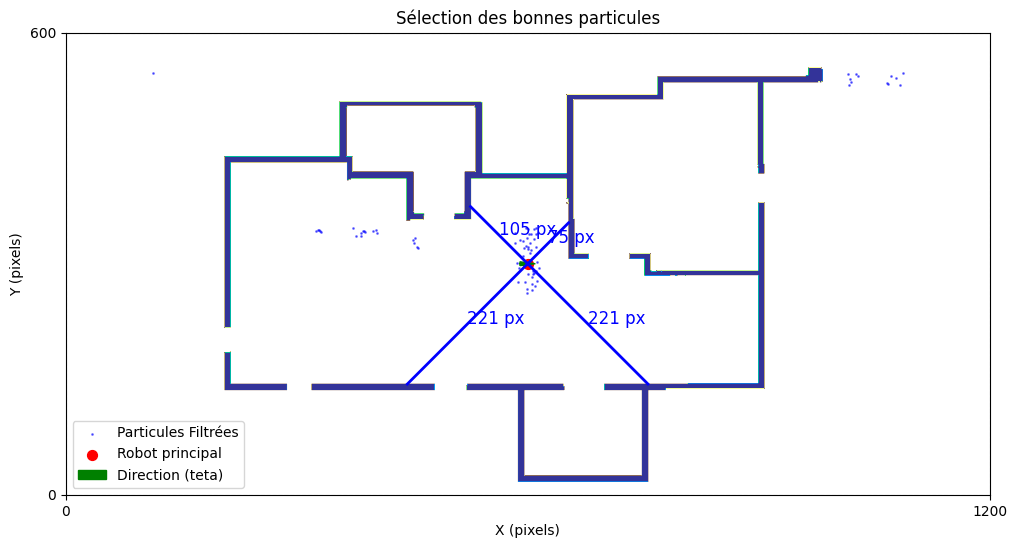

In [4]:
# Fonction pour filtrer les particules

def filtrer_particules(particules, robot, terrain, tolérance=0.5):

    angles = [math.pi / 4, 3 * math.pi / 4, 5 * math.pi / 4, 7 * math.pi / 4]

    # Calculer les diagonales du robot
    diagonales_robot = [tracer_diagonale(robot, angle, terrain)[2] for angle in angles]

    particules_valides = []
    for particule in particules:
        diagonales_particule = [tracer_diagonale(particule, angle, terrain)[2] for angle in angles]

        # Vérification des différences pour chaque diagonale
        valide = all(
            abs(dr - dp) / dr <= tolérance  # dr != 0
            if dr != 0 else abs(dr - dp) / dp <= tolérance  # si dr == 0
            for dr, dp in zip(diagonales_robot, diagonales_particule)
        )

        if valide:
            particules_valides.append(particule)

    return particules_valides

# Filtrage des particules
particules_filtrées = filtrer_particules(particules, robot, terrain, tolérance=0.3)

# Affichage des particules filtrées
plt.figure(figsize=(12, 6))
plt.imshow(terrain, extent=(0, terrain_width, 0, terrain_height), origin='lower', cmap='terrain')
x_coords_filtrées = [p.x for p in particules_filtrées]
y_coords_filtrées = [p.y for p in particules_filtrées]
plt.scatter(x_coords_filtrées, y_coords_filtrées, color="blue", s=1, alpha=0.5, label="Particules Filtrées")

# Affichage ddu robot
plt.scatter(robot.x, robot.y, color="red", s=50, label="Robot principal")

# Affichage de la direction du robot
dx = 10 * math.cos(robot.teta)
dy = 10 * math.sin(robot.teta)
plt.arrow(
    robot.x, robot.y, dx, dy,
    color="green", head_width=5, head_length=20, length_includes_head=True,
    label="Direction (teta)"
)

# diagonales
angles = [math.pi / 4, 3 * math.pi / 4, 5 * math.pi / 4, 7 * math.pi / 4]
for angle in angles:
    x_end, y_end, distance = tracer_diagonale(robot, angle, terrain)
    plt.plot([robot.x, x_end], [robot.y, y_end], color='blue', lw=2)
    plt.text((robot.x + x_end) / 2, (robot.y + y_end) / 2, f"{int(distance)} px", color='blue', fontsize=12)

# affichage
plt.title("Sélection des bonnes particules")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(range(0, terrain_width + 1, 1200))
plt.yticks(range(0, terrain_height + 1, 600))
plt.xlabel("X (pixels)")
plt.ylabel("Y (pixels)")
plt.xlim(0, terrain_width)
plt.ylim(0, terrain_height)
plt.show()

Duplication des bonnes particules et déplacement

Nombre total de particules affichées : 505


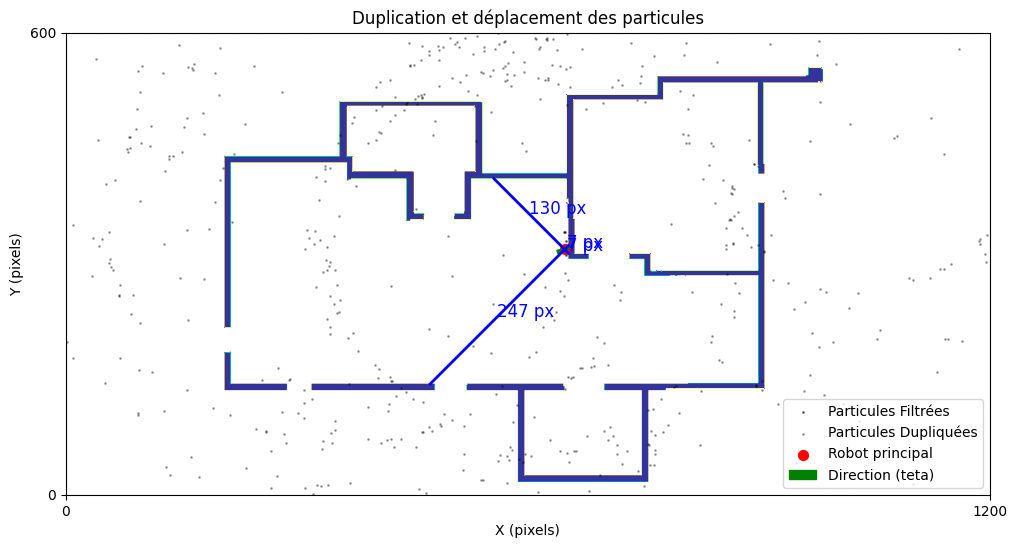

In [ ]:
# Fonction pour générer de nouvelles particules :
def generer_nouvelles_particules(particules_valides, echantillon_total, distance, angle):
    nouvelles_particules = []

    # Dupliquer 80% des particules valides
    nb_duplicats = int(0.8 * echantillon_total)  # Nombre total de duplicatas souhaités
    for particule in particules_valides:
        for _ in range(int(nb_duplicats / len(particules_valides))):
            nouvelle_particule = Robot()  # Création de nouvelles particules
            nouvelle_particule.x = particule.x  # Mise à jour de x
            nouvelle_particule.y = particule.y  # Mise à jour de y
            nouvelle_particule.teta = particule.teta  # Mise à jour de teta
            nouvelle_particule.move(distance, angle)
            nouvelles_particules.append(nouvelle_particule)

    # Ajouter 20% de nouvelles particules aléatoires
    nb_nouvelles = echantillon_total - len(nouvelles_particules)
    for _ in range(nb_nouvelles):
        nouvelles_particules.append(Robot())

    return nouvelles_particules


# Fonction pour déplacer les particules et le robot
def sense(robot, particules_filtrées, nouvelles_particules, distance, angle):
    # Déplacer le robot
    robot.move(distance, angle)

    # Déplacer les particules
    for particule in particules_filtrées:
        particule.move(distance, angle)
    
    for particule in nouvelles_particules:
        particule.move(distance, angle)

    return robot, particules_filtrées, nouvelles_particules


for i in range (20):
    # Génération des nouvelles particules
    nouvelles_particules = generer_nouvelles_particules(particules_filtrées, 500, distance, angle)

    # Déplacement
    distance = 50
    angle = 0

    # Déplacement des particules et du robot
    robot, particules_filtrées, nouvelles_particules = sense(robot, particules_filtrées, nouvelles_particules, distance, angle)

    # refiltrage des particules
    particules_filtrées = filtrer_particules(particules, robot, terrain, tolérance=0.3)

    # Affichage des particules
    total_particules = len(particules_filtrées) + len(nouvelles_particules)
    print(f"Nombre total de particules affichées : {total_particules}")

    plt.figure(figsize=(12, 6))
    plt.imshow(terrain, extent=(0, terrain_width, 0, terrain_height), origin='lower', cmap='terrain')

    # Affichage des particules filtrées (en noir)
    x_coords_filtrées = [p.x for p in particules_filtrées]
    y_coords_filtrées = [p.y for p in particules_filtrées]
    plt.scatter(x_coords_filtrées, y_coords_filtrées, color="black", s=1, alpha=0.5, label="Particules Filtrées")

    # Affichage des nouvelles particules (en rouge)
    x_coords_dup = [p.x for p in nouvelles_particules]
    y_coords_dup = [p.y for p in nouvelles_particules]
    plt.scatter(x_coords_dup, y_coords_dup, color="black", s=1, alpha=0.3, label="Particules Dupliquées")

    # Affichage du robot
    plt.scatter(robot.x, robot.y, color="red", s=50, label="Robot principal")

    # Affichage de la direction du robot
    dx = 10 * math.cos(robot.teta)
    dy = 10 * math.sin(robot.teta)
    plt.arrow(
        robot.x, robot.y, dx, dy,
        color="green", head_width=5, head_length=20, length_includes_head=True,
        label="Direction (teta)"
    )

    # Diagonales
    angles = [math.pi / 4, 3 * math.pi / 4, 5 * math.pi / 4, 7 * math.pi / 4]
    for angle in angles:
        x_end, y_end, distance = tracer_diagonale(robot, angle, terrain)
        plt.plot([robot.x, x_end], [robot.y, y_end], color='blue', lw=2)
        plt.text((robot.x + x_end) / 2, (robot.y + y_end) / 2, f"{int(distance)} px", color='blue', fontsize=12)

    # Affichage final
    plt.title("Duplication et déplacement des particules")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.xticks(range(0, terrain_width + 1, 1200))
    plt.yticks(range(0, terrain_height + 1, 600))
    plt.xlabel("X (pixels)")
    plt.ylabel("Y (pixels)")
    plt.xlim(0, terrain_width)
    plt.ylim(0, terrain_height)
    plt.show()